# EDA Colleges.
analyse sur le ficheir "data/Second_deg_Colleges/fr-en-ips_colleges2016_2021.csv" 
- source 2016-2021=> https://www.data.gouv.fr/fr/datasets/r/b63bd365-c589-48e4-b7d8-9e4f5db133c5
- source 2022 + => https://www.data.gouv.fr/fr/datasets/r/28e511a7-af0d-48c7-a8bb-2f38ec003f49


Problématiques possible :
- correler les IPS et résultats brevet
- correler les IPS et résultats bac

Permettre a de nouveau arrivant de choisir/connaitre une ecole, un college, un lycée en fonction de l'ips et des résultat brevet pour les colleges, et BAC pour les lycée, conseiller des quartier/ville pour les nouveau clients d'agence immobiliere

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_2016 = pd.read_csv("./data/Second_deg_Colleges/fr-en-ips_colleges2016_2021.csv", sep=";")
df_2022 = pd.read_csv("./data/Second_deg_Colleges/fr-en-ips-colleges-ap2022.csv", sep=";")
df_2023 = pd.read_csv("./data/Second_deg_Colleges/fr-en-ips-colleges-ap2023.csv", sep=";")
df_geo = pd.read_csv("./data/Adresse_geolocalisation_etablissements/fr-en-adresse-et-geolocalisation-etablissements-premier-et-second-degre.csv", sep=";")
dfDNB = pd.read_csv("./data/resultats_DNB/fr-en-dnb-par-etablissement.csv", sep=";")

In [3]:
df_2022.describe()

,effectifs,ips,ecart_type_de_l_ips
count,6973.000000,6973.000000,6973.000000
mean,464.516994,104.125713,30.023017
std,209.807839,16.178249,4.636571
min,7.000000,59.000000,6.000000
25%,318.000000,93.700000,27.300000
50%,456.000000,103.300000,30.000000
75%,596.000000,113.800000,32.900000
max,1830.000000,163.300000,44.900000


In [4]:
df_2016.describe()

,ips,ecart_type_de_l_ips
count,41701.000000,20861.000000
mean,102.783777,33.001313
std,16.678568,4.240689
min,47.500000,0.000000
25%,92.600000,30.900000
50%,102.200000,33.300000
75%,112.800000,35.500000
max,157.600000,87.700000


In [5]:
# ajout de la colonne "ecart_type_de_l_ips"
df_2016['ecart_type_de_l_ips']=""

In [6]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41701 entries, 0 to 41700
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rentree_scolaire          41701 non-null  object 
 1   academie                  41701 non-null  object 
 2   code_du_departement       41701 non-null  object 
 3   departement               41701 non-null  object 
 4   uai                       41701 non-null  object 
 5   nom_de_l_etablissment     41701 non-null  object 
 6   code_insee_de_la_commune  41701 non-null  object 
 7   nom_de_la_commune         41701 non-null  object 
 8   secteur                   41701 non-null  object 
 9   ips                       41701 non-null  float64
 10  ecart_type_de_l_ips       41701 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.5+ MB


In [7]:
df_2023.info()
colNames= df_2022.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rentrée scolaire          6989 non-null   object 
 1   Académie                  6989 non-null   object 
 2   Code du département       6989 non-null   object 
 3   Département               6989 non-null   object 
 4   UAI                       6989 non-null   object 
 5   Nom de l'établissement    6989 non-null   object 
 6   Nom de la commune         6989 non-null   object 
 7   Code INSEE de la commune  6989 non-null   object 
 8   Secteur                   6989 non-null   object 
 9   Effectifs                 6989 non-null   int64  
 10  IPS                       6989 non-null   float64
 11  Ecart-type de l'IPS       6989 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 655.3+ KB


In [8]:
df_2023.columns = colNames

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


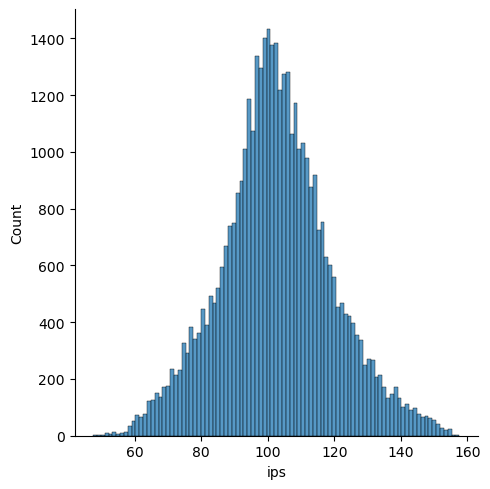

In [9]:
#visu IPS
fig2016 = sns.displot(df_2016, x='ips')

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


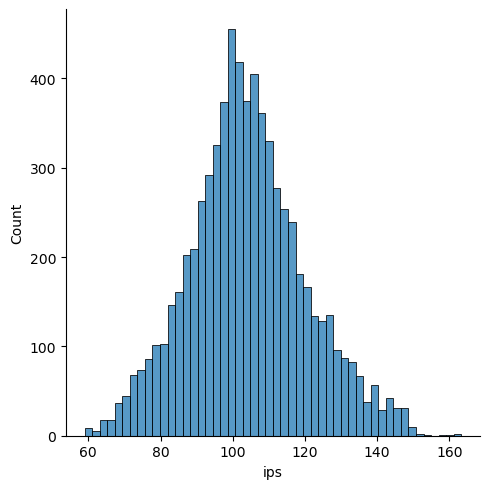

In [10]:
sns.displot(df_2022, x='ips')

Normalisation des data 2016-2022 
- Normalisé_x = (x - min(x)) / (max(x) - min(x))

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


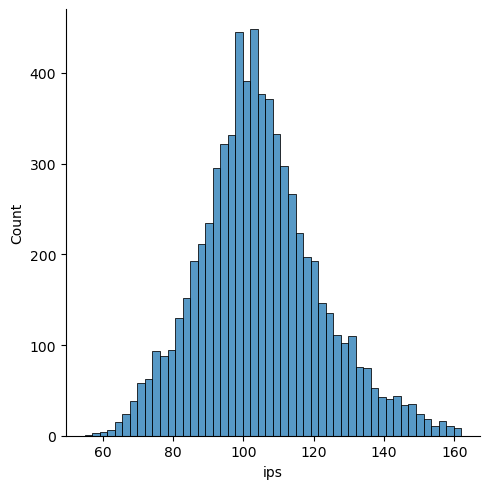

In [11]:
sns.displot(df_2023, x='ips')

In [12]:
df_2016['ips']= df_2016['ips'] / df_2016['ips'].abs().max()

In [13]:
df_2022['ips']= df_2022['ips'] / df_2022['ips'].abs().max()

In [14]:
df_2023['ips']= df_2023['ips'] / df_2023['ips'].abs().max()

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


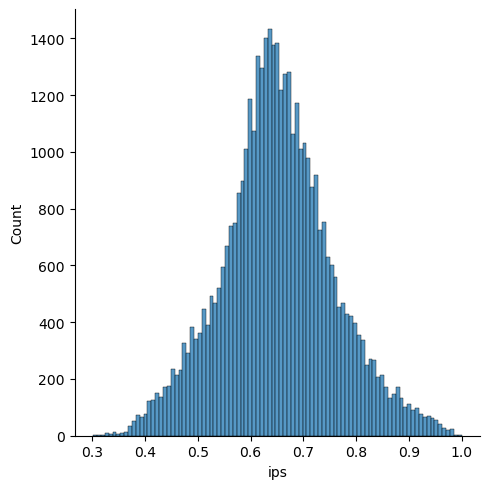

In [15]:
fig2016 = sns.displot(df_2016, x='ips')

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


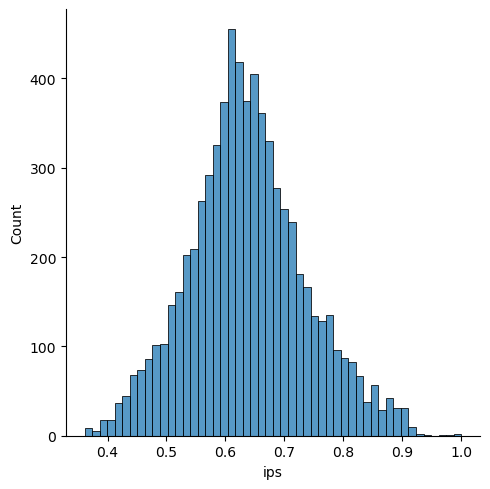

In [16]:
fig2022 = sns.displot(df_2022, x='ips')

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


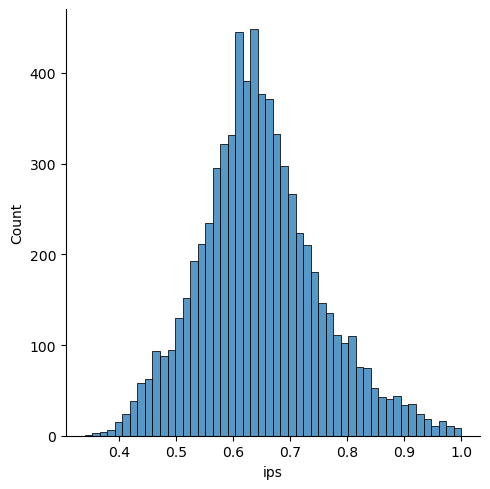

In [17]:
sns.displot(df_2023, x='ips')

<Axes: >

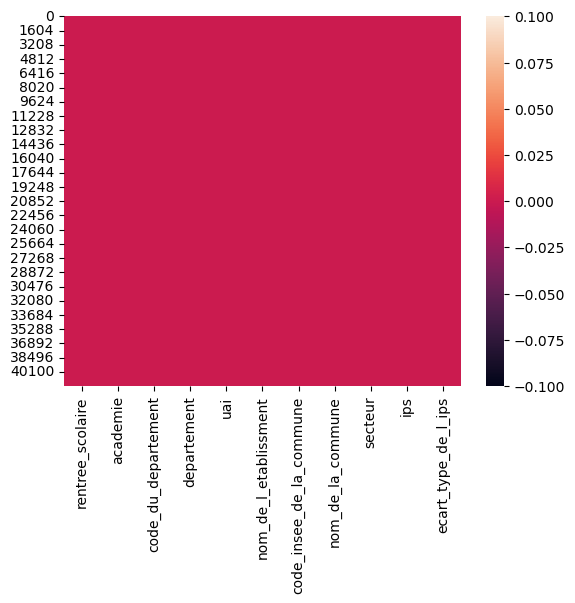

In [18]:
sns.heatmap(df_2016.isnull())

<Axes: >

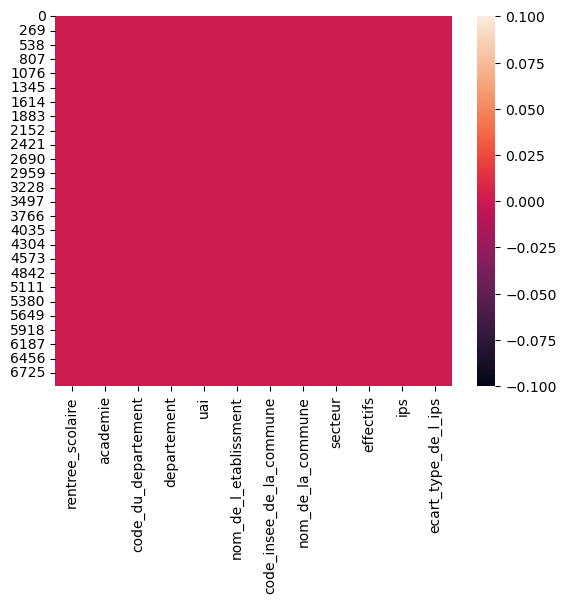

In [19]:
sns.heatmap(df_2022.isnull())

<Axes: >

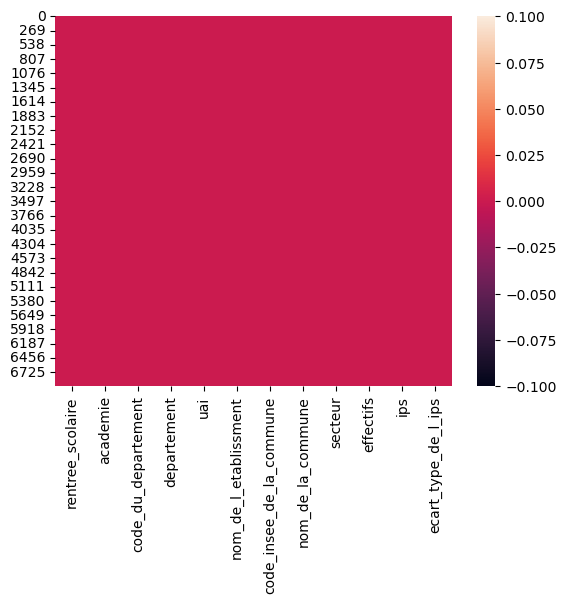

In [20]:
sns.heatmap(df_2023.isnull())

In [21]:
df_1622 = pd.concat([df_2016 ,df_2022, df_2023], axis=0)

<Axes: >

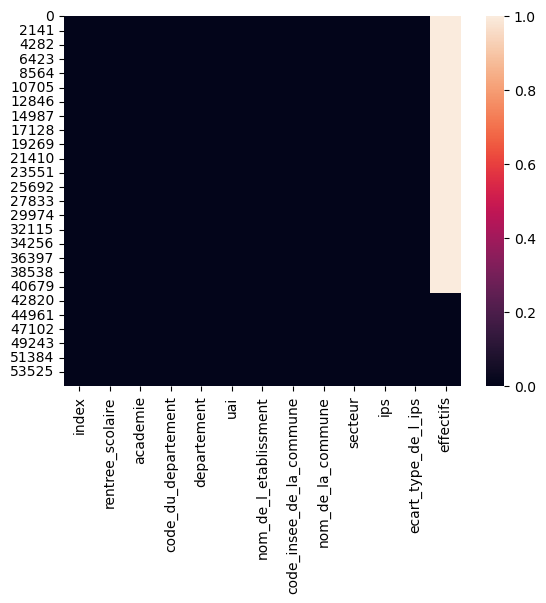

In [22]:
df_1622 = df_1622.reset_index()
sns.heatmap(df_1622.isna())

In [23]:
df_1622.describe()

,index,ips,effectifs
count,55663.000000,55663.000000,13962.000000
mean,16495.576846,0.649692,465.338777
std,12892.589416,0.105092,210.996184
min,0.000000,0.301396,4.000000
25%,4638.000000,0.584813,319.000000
50%,13869.000000,0.645305,458.000000
75%,27784.500000,0.712799,597.000000
max,41700.000000,1.000000,1891.000000


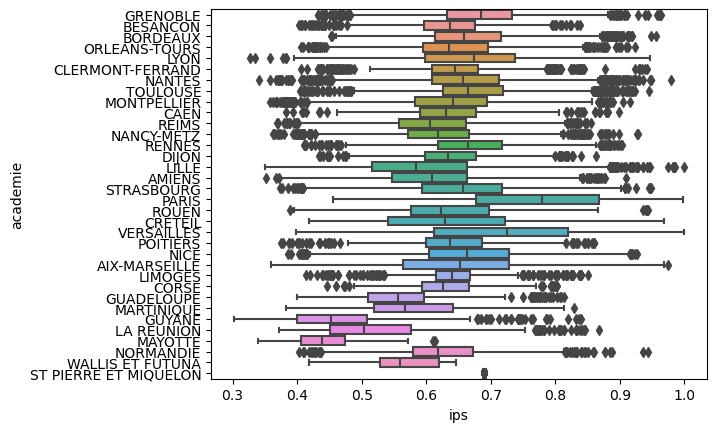

In [24]:
fig1622 = sns.boxplot(df_1622, x='ips',y=df_1622['academie'])


In [25]:
# évolution Lyon
dflyon = df_1622[df_1622['academie'] == "LYON"]


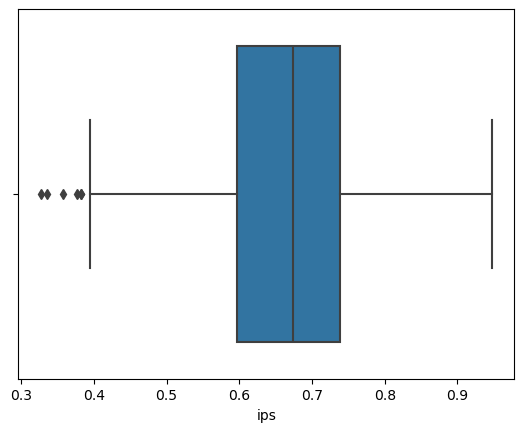

In [26]:

fig_lyon = sns.boxplot(dflyon, x='ips')


In [27]:
#mettre les data geo en face des colleges
dflyon.head()

,index,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,ips,ecart_type_de_l_ips,effectifs
36,36,2020-2021,LYON,042,LOIRE,0420003A,COLLEGE DU PILAT,42023,BOURG ARGENTAL,public,0.685279,,NaN
37,37,2020-2021,LYON,042,LOIRE,0420060M,COLLEGE PAPIRE MASSON,42230,SAINT GERMAIN LAVAL,public,0.680203,,NaN
38,38,2020-2021,LYON,042,LOIRE,0420062P,COLLEGE LE BREUIL,42248,SAINT JUST EN CHEVALET,public,0.641497,,NaN
39,39,2020-2021,LYON,042,LOIRE,0420916T,COLLEGE PUITS DE LA LOIRE,42218,SAINT ETIENNE,public,0.467005,,NaN
40,40,2020-2021,LYON,042,LOIRE,0421041D,COLLEGE PRIVE NOTRE DAME D ESPERANCE,42218,SAINT ETIENNE,privé sous contrat,0.673858,,NaN


In [28]:
df_geo.head()

,numero_uai,appellation_officielle,denomination_principale,patronyme_uai,secteur_public_prive_libe,adresse_uai,lieu_dit_uai,boite_postale_uai,code_postal_uai,localite_acheminement_uai,...,code_commune,libelle_departement,libelle_region,libelle_academie,position,secteur_prive_code_type_contrat,secteur_prive_libelle_type_contrat,code_ministere,libelle_ministere,date_ouverture
0,0341298B,Ecole maternelle Arc en Ciel,ECOLE MATERNELLE PUBLIQUE,ARC EN CIEL,Public,149 rue des Quatre Vents,NaN,NaN,34400,LUNEL,...,34145,Hérault,Occitanie,Montpellier,"43.671648379152025, 4.138319556191889",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1972-06-12
1,0341307L,Ecole primaire Jean Jaurès,ECOLE PRIMAIRE PUBLIQUE,JEAN JAURES,Public,1 place DU 14 JUILLET,NaN,NaN,34420,PORTIRAGNES,...,34209,Hérault,Occitanie,Montpellier,"43.3039891375926, 3.33216003205677",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1972-06-12
2,0341321B,Collège Katia et Maurice Krafft,COLLEGE,KATIA ET MAURICE KRAFFT,Public,BOULEVARD YVES DU MANOIR,NaN,3013,34513,BEZIERS CEDEX,...,34032,Hérault,Occitanie,Montpellier,"43.336826651792556, 3.2495802249959187",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1974-04-06
3,0341342Z,Ecole maternelle les Garrigues,ECOLE MATERNELLE PUBLIQUE,LES GARRIGUES,Public,1008 allées de l'Europe,NaN,NaN,34990,JUVIGNAC,...,34123,Hérault,Occitanie,Montpellier,"43.61440482767392, 3.8050099468317837",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1973-06-15
4,0341344B,Ecole maternelle André Malraux,ECOLE MATERNELLE PUBLIQUE,ANDRE MALRAUX,Public,Rue André Malraux,NaN,NaN,34280,LA GRANDE MOTTE,...,34344,Hérault,Occitanie,Montpellier,"43.562660400295485, 4.090050326991836",99.0,SANS OBJET,6,MINISTERE DE L'EDUCATION NATIONALE,1973-06-15


In [29]:
df = df_1622.merge(df_geo, how='left', left_on="uai", right_on='numero_uai' )

In [30]:
df.head()

,index,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,...,code_commune,libelle_departement,libelle_region,libelle_academie,position,secteur_prive_code_type_contrat,secteur_prive_libelle_type_contrat,code_ministere,libelle_ministere,date_ouverture
0,0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,...,38185,Isère,Auvergne-Rhône-Alpes,Grenoble,"45.173750473834154, 5.7371100497222685",99.0,SANS OBJET,6.0,MINISTERE DE L'EDUCATION NATIONALE,1972-02-23
1,1,2020-2021,GRENOBLE,038,ISERE,0382103E,COLLEGE LAMARTINE,38138,CREMIEU,public,...,38138,Isère,Auvergne-Rhône-Alpes,Grenoble,"45.72322863082592, 5.246660478563362",99.0,SANS OBJET,6.0,MINISTERE DE L'EDUCATION NATIONALE,1973-02-21
2,2,2020-2021,GRENOBLE,038,ISERE,0382195E,COLLEGE PRIVE SAINT CHARLES,38544,VIENNE,privé sous contrat,...,38544,Isère,Auvergne-Rhône-Alpes,Grenoble,"45.52773491421914, 4.877069971240804",30.0,CONTRAT D'ASSOCIATION TOUTES CLASSES,6.0,MINISTERE DE L'EDUCATION NATIONALE,1974-09-13
3,3,2020-2021,GRENOBLE,038,ISERE,0382427G,COLLEGE LE GUILLON,38315,LE PONT DE BEAUVOISIN,public,...,38315,Isère,Auvergne-Rhône-Alpes,Grenoble,"45.537621451073555, 5.657259902030709",99.0,SANS OBJET,6.0,MINISTERE DE L'EDUCATION NATIONALE,1977-03-01
4,4,2020-2021,GRENOBLE,038,ISERE,0382429J,COLLEGE SPORTIF JEAN PREVOST,38548,VILLARD DE LANS,public,...,38548,Isère,Auvergne-Rhône-Alpes,Grenoble,"45.063693629081726, 5.555459955142692",99.0,SANS OBJET,6.0,MINISTERE DE L'EDUCATION NATIONALE,1977-03-01


In [31]:
# ajout des résultats du brevet
df = df.merge(dfDNB, how='left', left_on="uai", right_on="Numero d'etablissement" )

In [32]:
df.head()

,index,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Nombre_d_admis_Mention_AB,Admis Mention bien,Admis Mention très bien,Taux de réussite
0,0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,...,1.0,AUVERGNE-RHONE-ALPES,157.0,153.0,132.0,44.0,34.0,35.0,19.0,"86,20%"
1,0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,...,1.0,AUVERGNE-RHONE-ALPES,138.0,136.0,112.0,51.0,23.0,31.0,7.0,"82,30%"
2,0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,...,1.0,AUVERGNE-RHONE-ALPES,192.0,187.0,149.0,30.0,42.0,41.0,36.0,"79,60%"
3,0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,...,1.0,AUVERGNE-RHONE-ALPES,153.0,144.0,122.0,56.0,33.0,22.0,11.0,"84,70%"
4,0,2020-2021,GRENOBLE,038,ISERE,0382035F,COLLEGE CHARLES MUNCH,38185,GRENOBLE,public,...,1.0,AUVERGNE-RHONE-ALPES,133.0,129.0,112.0,22.0,20.0,27.0,43.0,"86,80%"


In [33]:
df["Taux"] = df['Admis']/df['Inscrits']

<Axes: xlabel='Taux', ylabel='ips'>

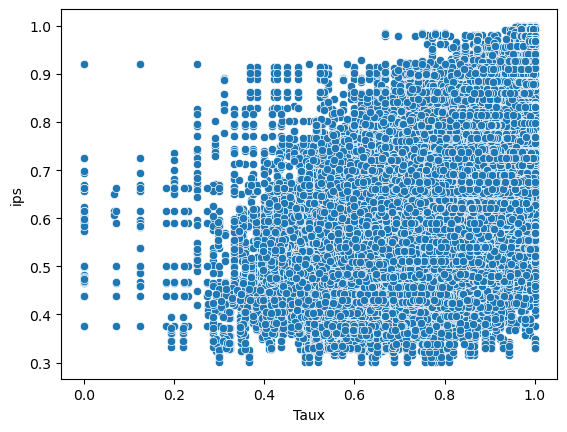

In [39]:
sns.scatterplot(df, x='Taux', y='ips')